In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from torch import nn, optim
import os

In [2]:
a = np.load('/data/home1/saichandra/Vardhan/projectAIP/pytorch-nerf/data/02773838/1b9ef45fefefa35ed13f430b2941481/01.npy')

(-0.5, 127.5, 127.5, -0.5)

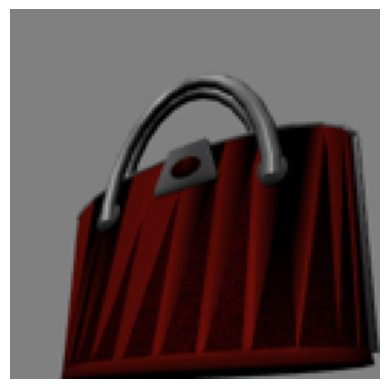

In [3]:
plt.imshow(a)
plt.axis('off') 

In [4]:
path = '/data/home1/saichandra/Vardhan/projectAIP/pytorch-nerf/data/02773838/1b9ef45fefefa35ed13f430b2941481'

In [5]:
# for file in os.listdir(path):
#     f = np.load(path+'/'+file)
#     # print(f.shape)
#     plt.imshow(f)
#     plt.axis('off') 
#     plt.show()
#     # print(file)

In [8]:
file = np.load('/data/home1/saichandra/Vardhan/projectAIP/pytorch-nerf/66bdbc812bd0a196e194052f3f12cb2e.npz')

In [9]:
pose = file["poses"]

In [11]:
type(pose), pose.shape

(numpy.ndarray, (800, 4, 4))

In [12]:
a = file["images"]
a.shape

(800, 100, 100, 3)

In [13]:
pose[0]

array([[ 0.76431459, -0.41655663,  0.49224361,  1.10754812],
       [ 0.        ,  0.76335355,  0.64598093,  1.45345709],
       [-0.64484355, -0.49373265,  0.58344226,  1.31274508],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [14]:
data = np.load('/data/home1/saichandra/Vardhan/projectAIP/pytorch-nerf/66bdbc812bd0a196e194052f3f12cb2e.npz')

images = data["images"] / 255
img_size = images.shape[1]
xs = torch.arange(img_size) - (img_size / 2 - 0.5)
ys = torch.arange(img_size) - (img_size / 2 - 0.5)

In [17]:
xs.shape, ys.shape

(torch.Size([100]), torch.Size([100]))

In [18]:
xs

tensor([-49.5000, -48.5000, -47.5000, -46.5000, -45.5000, -44.5000, -43.5000,
        -42.5000, -41.5000, -40.5000, -39.5000, -38.5000, -37.5000, -36.5000,
        -35.5000, -34.5000, -33.5000, -32.5000, -31.5000, -30.5000, -29.5000,
        -28.5000, -27.5000, -26.5000, -25.5000, -24.5000, -23.5000, -22.5000,
        -21.5000, -20.5000, -19.5000, -18.5000, -17.5000, -16.5000, -15.5000,
        -14.5000, -13.5000, -12.5000, -11.5000, -10.5000,  -9.5000,  -8.5000,
         -7.5000,  -6.5000,  -5.5000,  -4.5000,  -3.5000,  -2.5000,  -1.5000,
         -0.5000,   0.5000,   1.5000,   2.5000,   3.5000,   4.5000,   5.5000,
          6.5000,   7.5000,   8.5000,   9.5000,  10.5000,  11.5000,  12.5000,
         13.5000,  14.5000,  15.5000,  16.5000,  17.5000,  18.5000,  19.5000,
         20.5000,  21.5000,  22.5000,  23.5000,  24.5000,  25.5000,  26.5000,
         27.5000,  28.5000,  29.5000,  30.5000,  31.5000,  32.5000,  33.5000,
         34.5000,  35.5000,  36.5000,  37.5000,  38.5000,  39.50

In [19]:
ys

tensor([-49.5000, -48.5000, -47.5000, -46.5000, -45.5000, -44.5000, -43.5000,
        -42.5000, -41.5000, -40.5000, -39.5000, -38.5000, -37.5000, -36.5000,
        -35.5000, -34.5000, -33.5000, -32.5000, -31.5000, -30.5000, -29.5000,
        -28.5000, -27.5000, -26.5000, -25.5000, -24.5000, -23.5000, -22.5000,
        -21.5000, -20.5000, -19.5000, -18.5000, -17.5000, -16.5000, -15.5000,
        -14.5000, -13.5000, -12.5000, -11.5000, -10.5000,  -9.5000,  -8.5000,
         -7.5000,  -6.5000,  -5.5000,  -4.5000,  -3.5000,  -2.5000,  -1.5000,
         -0.5000,   0.5000,   1.5000,   2.5000,   3.5000,   4.5000,   5.5000,
          6.5000,   7.5000,   8.5000,   9.5000,  10.5000,  11.5000,  12.5000,
         13.5000,  14.5000,  15.5000,  16.5000,  17.5000,  18.5000,  19.5000,
         20.5000,  21.5000,  22.5000,  23.5000,  24.5000,  25.5000,  26.5000,
         27.5000,  28.5000,  29.5000,  30.5000,  31.5000,  32.5000,  33.5000,
         34.5000,  35.5000,  36.5000,  37.5000,  38.5000,  39.50

In [20]:
(xs, ys) = torch.meshgrid(xs, -ys, indexing="xy")

In [21]:
xs

tensor([[-49.5000, -48.5000, -47.5000,  ...,  47.5000,  48.5000,  49.5000],
        [-49.5000, -48.5000, -47.5000,  ...,  47.5000,  48.5000,  49.5000],
        [-49.5000, -48.5000, -47.5000,  ...,  47.5000,  48.5000,  49.5000],
        ...,
        [-49.5000, -48.5000, -47.5000,  ...,  47.5000,  48.5000,  49.5000],
        [-49.5000, -48.5000, -47.5000,  ...,  47.5000,  48.5000,  49.5000],
        [-49.5000, -48.5000, -47.5000,  ...,  47.5000,  48.5000,  49.5000]])

In [22]:
ys

tensor([[ 49.5000,  49.5000,  49.5000,  ...,  49.5000,  49.5000,  49.5000],
        [ 48.5000,  48.5000,  48.5000,  ...,  48.5000,  48.5000,  48.5000],
        [ 47.5000,  47.5000,  47.5000,  ...,  47.5000,  47.5000,  47.5000],
        ...,
        [-47.5000, -47.5000, -47.5000,  ..., -47.5000, -47.5000, -47.5000],
        [-48.5000, -48.5000, -48.5000,  ..., -48.5000, -48.5000, -48.5000],
        [-49.5000, -49.5000, -49.5000,  ..., -49.5000, -49.5000, -49.5000]])

In [23]:
q = (xs, ys)

In [25]:
q

(tensor([[-49.5000, -48.5000, -47.5000,  ...,  47.5000,  48.5000,  49.5000],
         [-49.5000, -48.5000, -47.5000,  ...,  47.5000,  48.5000,  49.5000],
         [-49.5000, -48.5000, -47.5000,  ...,  47.5000,  48.5000,  49.5000],
         ...,
         [-49.5000, -48.5000, -47.5000,  ...,  47.5000,  48.5000,  49.5000],
         [-49.5000, -48.5000, -47.5000,  ...,  47.5000,  48.5000,  49.5000],
         [-49.5000, -48.5000, -47.5000,  ...,  47.5000,  48.5000,  49.5000]]),
 tensor([[ 49.5000,  49.5000,  49.5000,  ...,  49.5000,  49.5000,  49.5000],
         [ 48.5000,  48.5000,  48.5000,  ...,  48.5000,  48.5000,  48.5000],
         [ 47.5000,  47.5000,  47.5000,  ...,  47.5000,  47.5000,  47.5000],
         ...,
         [-47.5000, -47.5000, -47.5000,  ..., -47.5000, -47.5000, -47.5000],
         [-48.5000, -48.5000, -48.5000,  ..., -48.5000, -48.5000, -48.5000],
         [-49.5000, -49.5000, -49.5000,  ..., -49.5000, -49.5000, -49.5000]]))

In [27]:
focal = float(data["focal"])
focal

98.20926810103637

In [33]:
pixel_coords = torch.stack([xs, ys, torch.full_like(xs, -focal)], dim=-1)
pixel_coords.shape


torch.Size([100, 100, 3])

In [34]:
camera_coords = pixel_coords / focal

In [35]:
camera_coords.shape

torch.Size([100, 100, 3])

In [37]:
camera_coords[0,0], pixel_coords[0,0]

(tensor([-0.5040,  0.5040, -1.0000]), tensor([-49.5000,  49.5000, -98.2093]))

In [39]:
device = 'cpu'

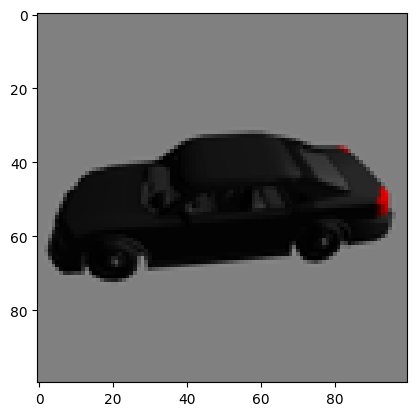

In [41]:
init_ds = camera_coords.to(device)
init_o = torch.Tensor(np.array([0, 0, float(data["camera_distance"])])).to(device)

test_idx = 150
plt.imshow(images[test_idx])
plt.show()
test_img = torch.Tensor(images[test_idx]).to(device)
poses = data["poses"]
test_R = torch.Tensor(poses[test_idx, :3, :3]).to(device)
test_ds = torch.einsum("ij,hwj->hwi", test_R, init_ds)
test_os = (test_R @ init_o).expand(test_ds.shape)

In [43]:
test_R, test_ds

(tensor([[-0.1342,  0.5493, -0.8248],
         [ 0.0000,  0.8323,  0.5543],
         [ 0.9910,  0.0744, -0.1117]]),
 tensor([[[ 1.1693, -0.1348, -0.3503],
          [ 1.1679, -0.1348, -0.3402],
          [ 1.1665, -0.1348, -0.3302],
          ...,
          [ 1.0368, -0.1348,  0.6284],
          [ 1.0354, -0.1348,  0.6385],
          [ 1.0340, -0.1348,  0.6486]],
 
         [[ 1.1637, -0.1433, -0.3511],
          [ 1.1623, -0.1433, -0.3410],
          [ 1.1609, -0.1433, -0.3309],
          ...,
          [ 1.0312, -0.1433,  0.6277],
          [ 1.0298, -0.1433,  0.6378],
          [ 1.0284, -0.1433,  0.6478]],
 
         [[ 1.1581, -0.1518, -0.3518],
          [ 1.1567, -0.1518, -0.3418],
          [ 1.1553, -0.1518, -0.3317],
          ...,
          [ 1.0256, -0.1518,  0.6269],
          [ 1.0242, -0.1518,  0.6370],
          [ 1.0228, -0.1518,  0.6471]],
 
         ...,
 
         [[ 0.6267, -0.9569, -0.4238],
          [ 0.6253, -0.9569, -0.4137],
          [ 0.6240, -0.9569, -0.40